### Data Set Creation

Size of the dataset - 10,000 cpu times

CPU Times are estiamted for process types and generated based on assumption

Type of Process

1. OS - 3s - 5s
2. GUI - 6s - 8s
3. Foreground 10s - 12s
4. Background - 12s - 15s
5. Backup - 20s

In [1]:
import random
import statistics 
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def os_cpu_time():
  return random.choice([3,4,5])

def gui_cpu_time():
  return random.choice([6,7,8])

def fg_cpu_time():
  return random.choice([10,11,12])

def bg_cpu_time():
  return random.choice([12,13,14,15])

def bk_cpu_time():
  return random.choice([18,19,20,21])

In [3]:
result = []
for _ in range(10000):
  result.append(random.choice([os_cpu_time, gui_cpu_time, fg_cpu_time, bg_cpu_time, bk_cpu_time])())

In [4]:
assert len(result) == 10000

In [5]:
print(result[:20])

[7, 15, 6, 13, 11, 19, 11, 6, 3, 19, 21, 12, 20, 18, 21, 8, 6, 11, 18, 14]


### Chebyshev's inequality



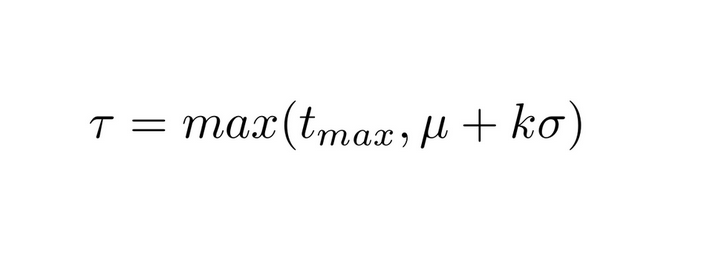

In [6]:
tmax = max(result)
mean = statistics.mean(result)
stdev = statistics.stdev(result)
k = range(20)
l1 = []

In [7]:
for _ in k:
  r = max(tmax, mean + _ * stdev)
  print(f"For k = {_} Threshold = {r}")
  l1.append(r)

For k = 0 Threshold = 21
For k = 1 Threshold = 21
For k = 2 Threshold = 22.086851551230243
For k = 3 Threshold = 27.593877326845366
For k = 4 Threshold = 33.100903102460485
For k = 5 Threshold = 38.607928878075604
For k = 6 Threshold = 44.11495465369073
For k = 7 Threshold = 49.62198042930585
For k = 8 Threshold = 55.12900620492097
For k = 9 Threshold = 60.63603198053609
For k = 10 Threshold = 66.14305775615121
For k = 11 Threshold = 71.65008353176634
For k = 12 Threshold = 77.15710930738146
For k = 13 Threshold = 82.66413508299658
For k = 14 Threshold = 88.1711608586117
For k = 15 Threshold = 93.67818663422682
For k = 16 Threshold = 99.18521240984194
For k = 17 Threshold = 104.69223818545706
For k = 18 Threshold = 110.19926396107218
For k = 19 Threshold = 115.7062897366873


### Markov's inequality

![image
](https://wikimedia.org/api/rest_v1/media/math/render/svg/a1786af7aa4d42a93bb9baaa10c334ecc710522e)

In [8]:
def calc_freq(result):
  d = {}
  for i in result:
    d[i] = d.get(i, 0) + 1
  return d

def expected_value(result):
  d = calc_freq(result)
  values = np.asarray(list(d.keys()))
  weights = np.asarray(list(d.values()))
  return (values * weights).sum() / weights.sum()

In [9]:
x = max(result)
e = expected_value(result)
a = range(20)
l2 = []

In [10]:
for _ in a:
  r = max(x,  _ * e)
  print(f"For a = {_} Threshold = {r}")
  l2.append(r)

For a = 0 Threshold = 21
For a = 1 Threshold = 21
For a = 2 Threshold = 22.1456
For a = 3 Threshold = 33.2184
For a = 4 Threshold = 44.2912
For a = 5 Threshold = 55.364000000000004
For a = 6 Threshold = 66.4368
For a = 7 Threshold = 77.5096
For a = 8 Threshold = 88.5824
For a = 9 Threshold = 99.65520000000001
For a = 10 Threshold = 110.72800000000001
For a = 11 Threshold = 121.80080000000001
For a = 12 Threshold = 132.8736
For a = 13 Threshold = 143.9464
For a = 14 Threshold = 155.0192
For a = 15 Threshold = 166.092
For a = 16 Threshold = 177.1648
For a = 17 Threshold = 188.23760000000001
For a = 18 Threshold = 199.31040000000002
For a = 19 Threshold = 210.38320000000002


### Modified Chebyshev's inequality

In [11]:
tmax = max(result)
mean = statistics.mean(result)
var = statistics.variance(result)
k = range(20)

In [12]:
for _ in k:
  r = max(tmax * tmax, mean * mean + _ * _ * var + 2 * mean * _ * math.sqrt(var))
  print(f"For k = {_} Threshold = {math.sqrt(r)}")

For k = 0 Threshold = 21.0
For k = 1 Threshold = 21.0
For k = 2 Threshold = 22.086851551230243
For k = 3 Threshold = 27.593877326845366
For k = 4 Threshold = 33.100903102460485
For k = 5 Threshold = 38.60792887807561
For k = 6 Threshold = 44.11495465369073
For k = 7 Threshold = 49.62198042930585
For k = 8 Threshold = 55.12900620492098
For k = 9 Threshold = 60.636031980536096
For k = 10 Threshold = 66.14305775615121
For k = 11 Threshold = 71.65008353176634
For k = 12 Threshold = 77.15710930738146
For k = 13 Threshold = 82.66413508299658
For k = 14 Threshold = 88.1711608586117
For k = 15 Threshold = 93.67818663422682
For k = 16 Threshold = 99.18521240984194
For k = 17 Threshold = 104.69223818545707
For k = 18 Threshold = 110.19926396107219
For k = 19 Threshold = 115.70628973668731


In [13]:
df = pd.DataFrame(list(zip(l1,l2)), columns=["Chebyshev's inequality","Markov's inequality"])

In [14]:
df.index += 1

In [15]:
df

,Chebyshev's inequality,Markov's inequality
1,21.000000,21.0000
2,21.000000,21.0000
3,22.086852,22.1456
4,27.593877,33.2184
5,33.100903,44.2912
6,38.607929,55.3640
7,44.114955,66.4368
8,49.621980,77.5096
9,55.129006,88.5824
10,60.636032,99.6552


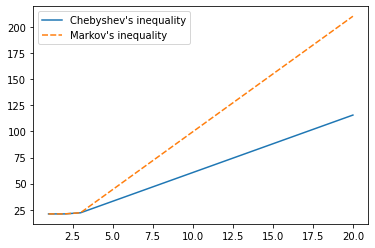

In [16]:
sns.lineplot(data=df)

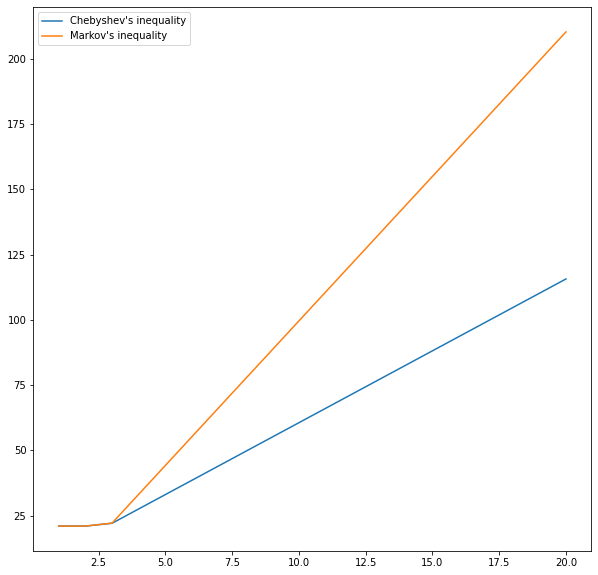

In [17]:
plt.figure(figsize=(10, 10))
plt.plot(df.index, df["Chebyshev's inequality"], label = "Chebyshev's inequality")
plt.plot(df.index, df["Markov's inequality"], label = "Markov's inequality")
plt.legend()
plt.show()